In [44]:
import pandas as pd
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
distances = pd.read_csv("../DataAcquisition/shortest_distances.csv")

Checking if the distances are normally distributed:

In [17]:
stats.normaltest(distances['distance_km']).pvalue

1.14823205293538e-230

1. Splitting the distances into equal length bins and seeing how many outages occured that have distances in that distance interval for example from (0,3), is the number of outages that had a distance of between 0 to 3 to the nearest station.
2. Now we groupby these intervals and aggregate by counting the number of outages that are in this interval. This gives us outages per distance
3. We can do a statistical test like a T-test to see if there is a significant different between the first half of these outages compared to the second half of these outages.

In [18]:
#this cuts the data into 3 equal width bins.
data = pd.Series([2,19,1,20, 13, 19, 24, 30])
bins = pd.cut(data, bins=3)
print(bins)

0     (0.971, 10.667]
1    (10.667, 20.333]
2     (0.971, 10.667]
3    (10.667, 20.333]
4    (10.667, 20.333]
5    (10.667, 20.333]
6      (20.333, 30.0]
7      (20.333, 30.0]
dtype: category
Categories (3, interval[float64, right]): [(0.971, 10.667] < (10.667, 20.333] < (20.333, 30.0]]


In [19]:
n = 10 #number of bins
distance_bins = pd.cut(distances['distance_km'], bins=n)
distances['distance_bin'] = distance_bins
outages_per_dist = distances.groupby(['distance_bin']).size()
outages_per_dist = pd.DataFrame(outages_per_dist)
outages_per_dist = outages_per_dist.rename(columns={0:"#of outages"})
outages_per_dist


C:\Users\dorsa\AppData\Local\Temp\ipykernel_23568\1079504366.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  outages_per_dist = distances.groupby(['distance_bin']).size()


,#of outages
distance_bin,
"(-0.396, 45.623]",548
"(45.623, 91.186]",2
"(91.186, 136.749]",3
"(136.749, 182.312]",1
"(182.312, 227.875]",1
"(227.875, 273.439]",0
"(273.439, 319.002]",0
"(319.002, 364.565]",0
"(364.565, 410.128]",0


Checking if there is any correlation between the distance of the outage to the station and the time it took for the outage to be resolved:

In [ ]:
outages = pd.read_csv("../DataAcquisition/outages.csv")
outages['dateOn']
outages['dateOn'] = outages['dateOn'].apply(datetime.fromisoformat)
outages['dateOff'] = outages['dateOff'].apply(datetime.fromisoformat)
outages['timeOut'] = outages['dateOn'] - outages['dateOff']
outages['timeOut'] = outages['timeOut'].apply(lambda x: x.total_seconds()/60)
outages['timeOut']
#timeout is the total of minutes without power (we can change it into hours if its better)

0      3551.883333
1       354.066667
2       495.483333
3       516.883333
4       127.033333
          ...     
551     163.716667
552     124.633333
553      88.400000
554      52.133333
555      72.300000
Name: timeOut, Length: 556, dtype: float64

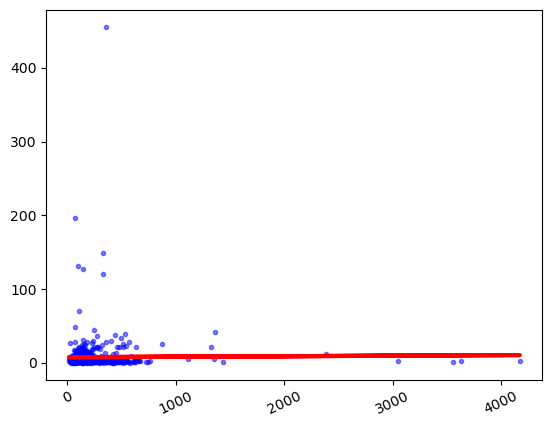

In [57]:
fit = stats.linregress(outages['timeOut'], distances['distance_km'])
plt.xticks(rotation = 25)
plt.plot(outages["timeOut"], distances["distance_km"], 'b.', alpha = 0.5)
plt.plot(outages["timeOut"], outages["timeOut"]*fit.slope + fit.intercept, 'r-', linewidth = 3)
plt.show()
#this plot doesnt look good because the distance csv that I created was not very good. 
#it would be nice to try it on our actual big dataset and the corresponding distances csv